In [25]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('fifa19.csv')
print(df)

       Unnamed: 0      ID                  Name  Age  \
0               0  158023              L. Messi   31   
1               1   20801     Cristiano Ronaldo   33   
2               2  190871             Neymar Jr   26   
3               3  193080                De Gea   27   
4               4  192985          K. De Bruyne   27   
5               5  183277             E. Hazard   27   
6               6  177003             L. Modrić   32   
7               7  176580             L. Suárez   31   
8               8  155862          Sergio Ramos   32   
9               9  200389              J. Oblak   25   
10             10  188545        R. Lewandowski   29   
11             11  182521              T. Kroos   28   
12             12  182493              D. Godín   32   
13             13  168542           David Silva   32   
14             14  215914              N. Kanté   27   
15             15  211110             P. Dybala   24   
16             16  202126               H. Kane 

In [30]:
fifa_df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential']]
print(fifa_df)

                       Name  Age          Nationality  Overall  Potential
0                  L. Messi   31            Argentina       94         94
1         Cristiano Ronaldo   33             Portugal       94         94
2                 Neymar Jr   26               Brazil       92         93
3                    De Gea   27                Spain       91         93
4              K. De Bruyne   27              Belgium       91         92
5                 E. Hazard   27              Belgium       91         91
6                 L. Modrić   32              Croatia       91         91
7                 L. Suárez   31              Uruguay       91         91
8              Sergio Ramos   32                Spain       91         91
9                  J. Oblak   25             Slovenia       90         93
10           R. Lewandowski   29               Poland       90         90
11                 T. Kroos   28              Germany       90         90
12                 D. Godín   32      

In [38]:
is_80 = fifa_df['Overall'] > 80
fifa_df_80= fifa_df[is_80]
print(fifa_df_80)

                  Name  Age Nationality  Overall  Potential
0             L. Messi   31   Argentina       94         94
1    Cristiano Ronaldo   33    Portugal       94         94
2            Neymar Jr   26      Brazil       92         93
3               De Gea   27       Spain       91         93
4         K. De Bruyne   27     Belgium       91         92
5            E. Hazard   27     Belgium       91         91
6            L. Modrić   32     Croatia       91         91
7            L. Suárez   31     Uruguay       91         91
8         Sergio Ramos   32       Spain       91         91
9             J. Oblak   25    Slovenia       90         93
10      R. Lewandowski   29      Poland       90         90
11            T. Kroos   28     Germany       90         90
12            D. Godín   32     Uruguay       90         90
13         David Silva   32       Spain       90         90
14            N. Kanté   27      France       89         90
15           P. Dybala   24   Argentina 

In [52]:
fifa_countries = fifa_df_80.groupby('Nationality')
fifa_countries['Overall'].count()

Nationality
Albania                  2
Algeria                  3
Argentina               20
Armenia                  1
Austria                  3
Belgium                 15
Bosnia Herzegovina       3
Brazil                  51
Central African Rep.     1
Chile                    4
Colombia                 5
Costa Rica               1
Croatia                 11
Czech Republic           2
DR Congo                 1
Denmark                  6
Ecuador                  1
Egypt                    1
England                 15
Finland                  1
France                  39
Gabon                    1
Germany                 35
Ghana                    2
Greece                   2
Guinea                   1
Iceland                  1
Italy                   30
Ivory Coast              3
Jamaica                  1
Japan                    1
Korea Republic           1
Mexico                   5
Montenegro               1
Morocco                  2
Netherlands             11
Norway          

In [74]:
to_drop = ['Albania','Algeria','Armenia','Austria','Bosnia Herzegovina','Central African Rep.','Chile','Colombia','Costa Rica','Czech Republic','DR Congo','Denmark','Ecuador','Egypt','Finland','Gabon','Ghana','Greece','Guinea','Iceland','Ivory Coast','Jamaica','Japan','Korea Republic','Mexico','Montenegro','Morocco','Norway','Poland','Russia','Scotland','Senegal','Serbia','Slovakia','Slovenia','Sweden','Switzerland','Turkey','Ukraine','Uruguay','Venezuela','Wales']
fifa_best = fifa_df_80[~fifa_df_80['Nationality'].isin(to_drop)]
print(fifa_best)

                  Name  Age Nationality  Overall  Potential
0             L. Messi   31   Argentina       94         94
1    Cristiano Ronaldo   33    Portugal       94         94
2            Neymar Jr   26      Brazil       92         93
3               De Gea   27       Spain       91         93
4         K. De Bruyne   27     Belgium       91         92
5            E. Hazard   27     Belgium       91         91
6            L. Modrić   32     Croatia       91         91
8         Sergio Ramos   32       Spain       91         91
11            T. Kroos   28     Germany       90         90
13         David Silva   32       Spain       90         90
14            N. Kanté   27      France       89         90
15           P. Dybala   24   Argentina       89         94
16             H. Kane   24     England       89         91
17        A. Griezmann   27      France       89         90
18       M. ter Stegen   26     Germany       89         92
19         T. Courtois   26     Belgium 

In [76]:
fifa_countries_best = fifa_best.groupby('Nationality')
fifa_countries_best['Overall'].count()

Nationality
Argentina      20
Belgium        15
Brazil         51
Croatia        11
England        15
France         39
Germany        35
Italy          30
Netherlands    11
Portugal       20
Spain          62
Name: Overall, dtype: int64

In [81]:
fifa_countries_best = fifa_best.groupby('Nationality')
fifa_countries_best.describe()

Age                                                       \
            count       mean       std   min    25%   50%    75%   max   
Nationality                                                              
Argentina    20.0  28.600000  2.623778  23.0  26.75  30.0  30.00  32.0   
Belgium      15.0  27.866667  2.559762  24.0  26.00  27.0  30.00  32.0   
Brazil       51.0  28.058824  3.646433  21.0  25.50  27.0  30.50  35.0   
Croatia      11.0  28.909091  3.144982  24.0  26.50  29.0  32.00  33.0   
England      15.0  25.866667  3.270357  20.0  24.00  25.0  28.00  32.0   
France       39.0  26.769231  4.264057  19.0  23.00  25.0  31.00  35.0   
Germany      35.0  26.514286  2.944301  22.0  24.50  27.0  29.00  32.0   
Italy        30.0  28.533333  4.695804  19.0  25.00  27.5  31.00  40.0   
Netherlands  11.0  26.181818  4.238353  18.0  25.00  26.0  28.50  34.0   
Portugal     20.0  27.200000  4.237676  21.0  24.00  26.0  31.00  35.0   
Spain        62.0  28.032258  3.954527  21.0  26.00  28.0  30.75  37.0   

            Overall             ...              Potential             \
              count       mean  ...    75%   max     count       mean   
Nationality                     ...                                     
Argentina      20.0  84.050000  ...   85.5  94.0      20.0  85.000000   
Belgium        15.0  85.533333  ...   87.0  91.0      15.0  86.466667   
Brazil         51.0  83.764706  ...   85.0  92.0      51.0  85.156863   
Croatia        11.0  83.636364  ...   84.5  91.0      11.0  84.909091   
England        15.0  82.866667  ...   83.5  89.0      15.0  85.066667   
France         39.0  83.589744  ...   85.0  89.0      39.0  86.282051   
Germany        35.0  83.742857  ...   85.0  90.0      35.0  85.628571   
Italy          30.0  83.166667  ...   84.0  89.0      30.0  84.800000   
Netherlands    11.0  83.090909  ...   84.0  86.0      11.0  85.727273   
Portugal       20.0  83.150000  ...   84.0  94.0      20.0  85.550000   
Spain          62.0  83.451613  ...   84.0  91.0      62.0  85.112903   

                                                       
                  std   min    25%   50%    75%   max  
Nationality                                            
Argentina    4.065257  81.0  82.00  84.0  87.25  94.0  
Belgium      2.924445  83.0  84.50  86.0  88.00  92.0  
Brazil       3.145616  81.0  83.00  84.0  87.50  93.0  
Croatia      2.913916  82.0  83.00  84.0  86.00  91.0  
England      3.575046  81.0  82.00  84.0  88.50  91.0  
France       3.612469  81.0  83.00  86.0  89.00  95.0  
Germany      3.087791  81.0  83.50  86.0  88.00  92.0  
Italy        3.220623  81.0  82.00  83.5  87.00  93.0  
Netherlands  3.036146  82.0  83.50  84.0  88.50  91.0  
Portugal     3.219595  81.0  83.75  86.0  86.25  94.0  
Spain        2.986883  81.0  83.00  85.0  87.00  93.0  

[11 rows x 24 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

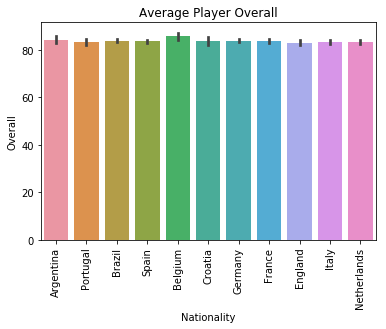

In [102]:
sns.barplot(fifa_best.Nationality, fifa_best.Overall)
plt.title('Average Player Overall')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

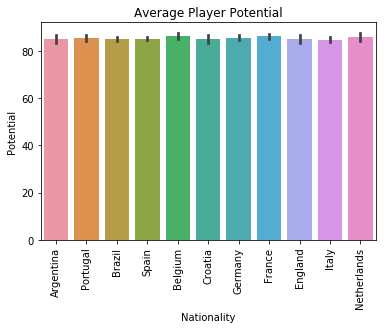

In [104]:
sns.barplot(fifa_best.Nationality, fifa_best.Potential)
plt.title('Average Player Potential')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

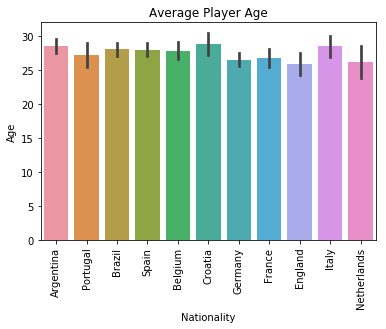

In [106]:
sns.barplot(fifa_best.Nationality, fifa_best.Age)
plt.title('Average Player Age')
plt.xticks(rotation=90)

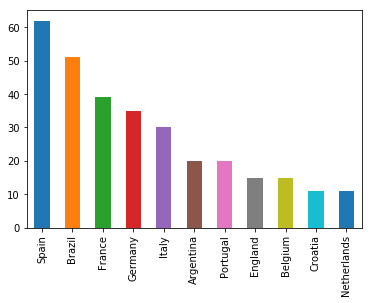

In [124]:
fifa_best['Nationality'].value_counts().plot(kind= 'bar')